In [51]:
import data_generator
import os
import multiprocessing
import argparse
import itertools
import math

import numpy as np
from numpy.random import SeedSequence, default_rng
import torch
from torch import Tensor
import matplotlib.pyplot as plt
from util.load_config_files import load_yaml_into_dotdict
from util.misc import NestedTensor
import pickle
import scipy.io as scio

In [59]:
result_path = '/home/weixinwei/data/MT3/Results/2023-04-18_012716'
metric_path = os.path.join(result_path, 'eval')
os.makedirs(os.path.join(metric_path, 'figure'), exist_ok=True)

In [60]:
og = pickle.load(open(os.path.join(metric_path, 'original_gospa.data'), 'rb'))
oo = pickle.load(open(os.path.join(metric_path, 'original_ospa.data'), 'rb'))

In [61]:
frame = 52
windowed = False
windowSize = 15
dt = 1
timeStep = frame - 1

if windowed:
	superTitle = f'Time Step = {frame}, Window Size = {windowSize}'
else:
	superTitle = f'Time Step = {frame}, No Windowed'

for method, deValue in og.items():
	for deType, value in deValue.items():
		# og[method][deType] = np.flipud(np.average(np.delete(np.array(value), -np.arange(len(value)%timeStep)-1).reshape(timeStep, -1), axis=1))
		og[method][deType] = np.average(np.delete(np.array(value), -np.arange(len(value)%timeStep)-1).reshape(timeStep, -1), axis=1)
for method, deValue in oo.items():
	for deType, value in deValue.items():
		# oo[method][deType] = np.flipud(np.average(np.delete(np.array(value), -np.arange(len(value)%timeStep)-1).reshape(timeStep, -1), axis=1))
		oo[method][deType] = np.average(np.delete(np.array(value), -np.arange(len(value)%timeStep)-1).reshape(timeStep, -1), axis=1)

/home/weixinwei/.conda/envs/wxw_MT3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/weixinwei/.conda/envs/wxw_MT3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [58]:
# oo['output']
scio.savemat(f'{metric_path}/OSPA2_5.mat', oo['output'])

In [ ]:
timeRange = np.arange(dt, frame*dt, dt)
r = 45
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10,6), dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

plt.subplot(221)
plt.plot(timeRange, og['output']['total'], color = 'b', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('GOSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('Total', fontsize = 10)

plt.subplot(222)
plt.plot(timeRange, og['output']['localization'], color = 'r', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('GOSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('Localization', fontsize = 10)

plt.subplot(223)
plt.plot(timeRange, og['output']['missed'], color = 'y', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('GOSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('Missed', fontsize = 10)

plt.subplot(224)
plt.plot(timeRange, og['output']['false'], color = 'g', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('GOSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('False', fontsize = 10)

plt.suptitle(f'{superTitle}, GOSPA Metric')
plt.savefig(f'{metric_path}/figure/GOSPA_Metric.png', bbox_inches='tight')
plt.show()

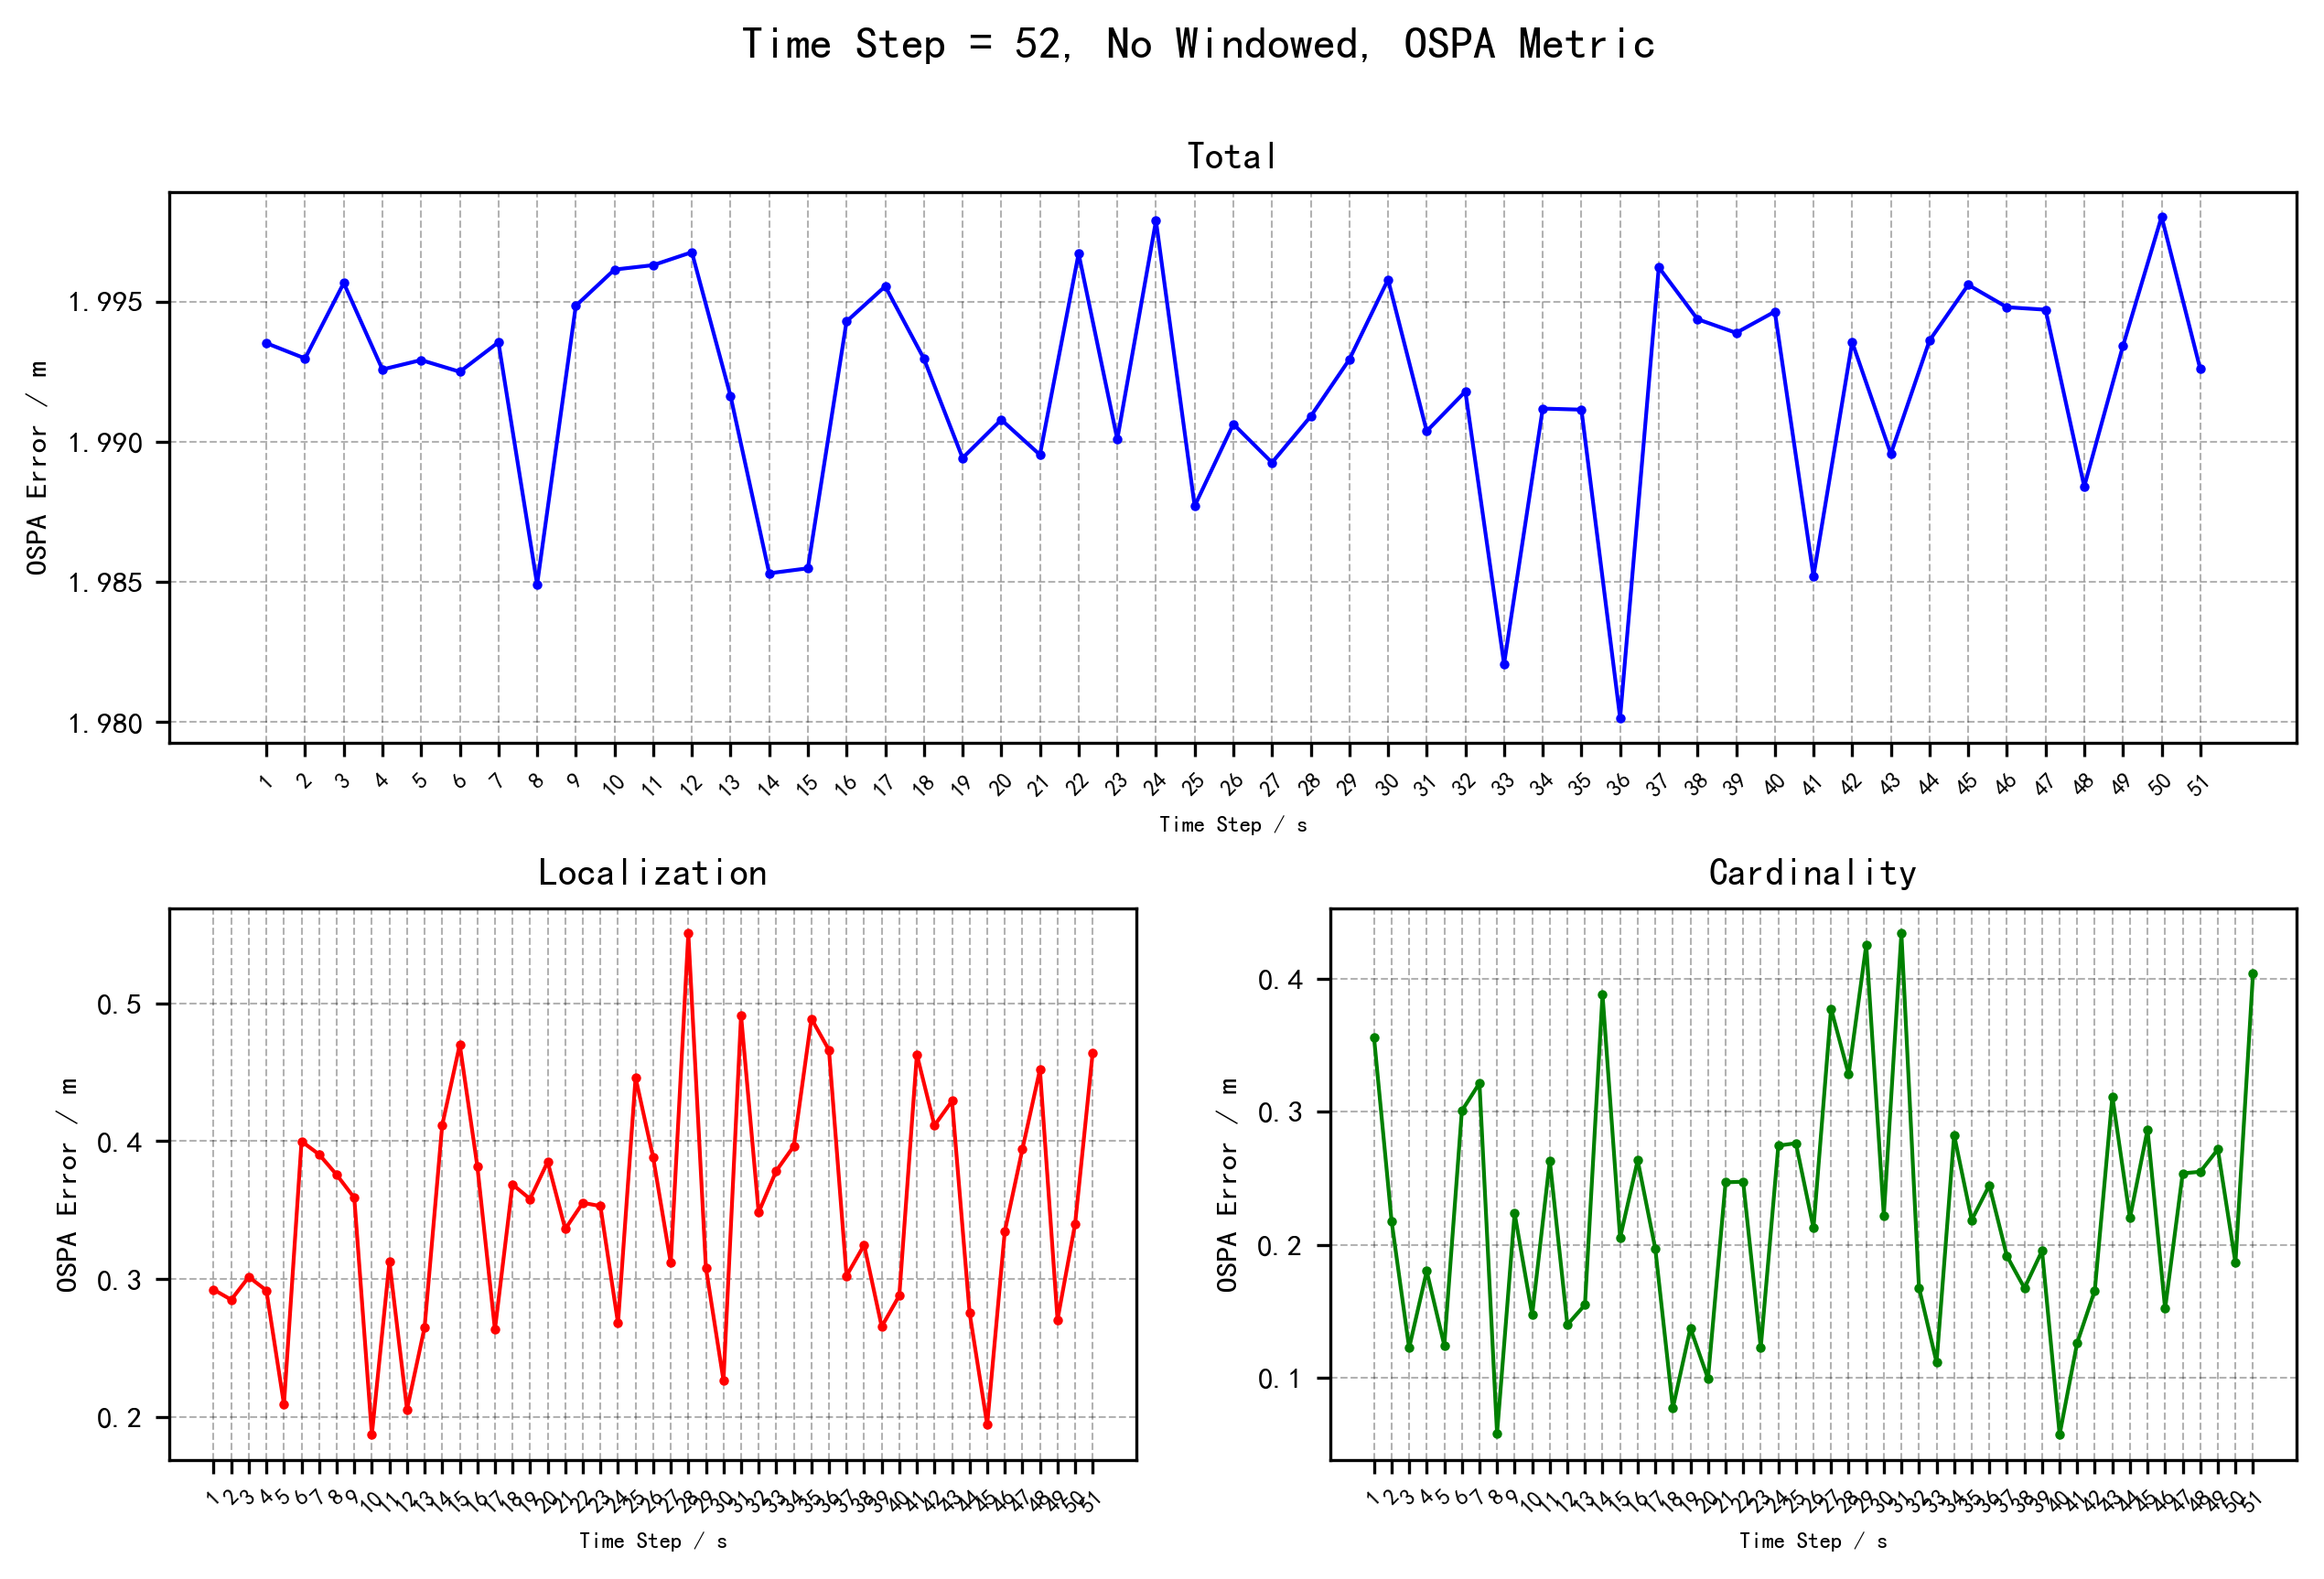

In [57]:
timeRange = np.arange(dt, frame*dt, dt)
r = 45
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10,6), dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

plt.subplot(211)
plt.plot(timeRange, oo['output']['total'], color = 'b', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('OSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('Total', fontsize = 10)

plt.subplot(223)
plt.plot(timeRange, oo['output']['localization'], color = 'r', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('OSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('Localization', fontsize = 10)

plt.subplot(224)
plt.plot(timeRange, oo['output']['cardinality'], color = 'g', ls='-', lw = 1, marker = '.', ms = 3)
plt.grid(linestyle="--", color="k", linewidth=0.5, alpha=0.3)
plt.xlabel('Time Step / s', fontsize=6)
plt.ylabel('OSPA Error / m', fontsize=8)
plt.xticks(timeRange, fontsize=6, rotation = r)
plt.yticks(fontsize=8)
plt.title('Cardinality', fontsize = 10)

plt.suptitle(f'{superTitle}, OSPA Metric')
plt.savefig(f'{metric_path}/figure/OSPA_Metric.png', bbox_inches='tight')
plt.show()